In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import athplot
import numpy as np
import os
import importlib
os.chdir("/home/astrosun/jtlaune/athena/")
from mpl_styles import analytic
%matplotlib widget
import yt
yt.set_log_level("error")
importlib.reload(athplot)

<module 'athplot' from '/home/astrosun/jtlaune/athena/athplot.py'>

# Mesh

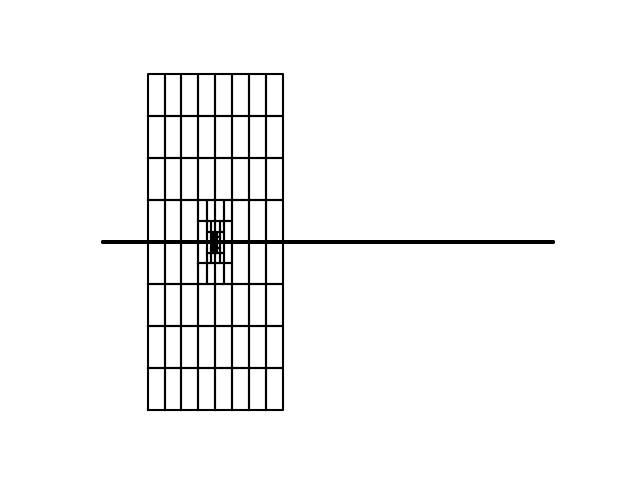

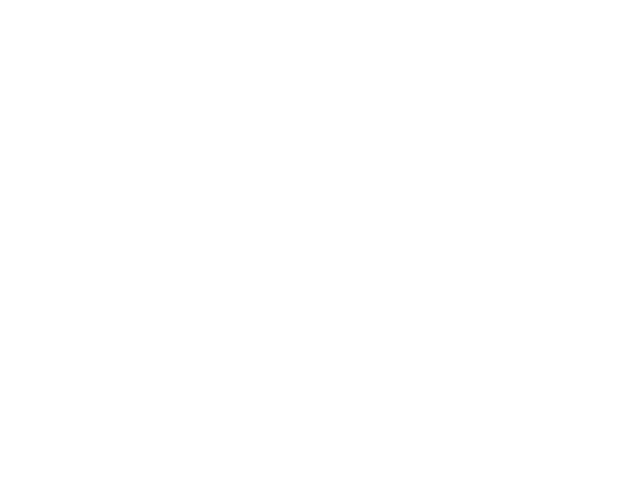

In [3]:
%run -i vis/python/plot_mesh.py -i work/smr5_noAcc/mesh_structure.dat -o show

# 2D plots

dict_keys(['rho', 'vel1', 'vel2', 'vel3'])


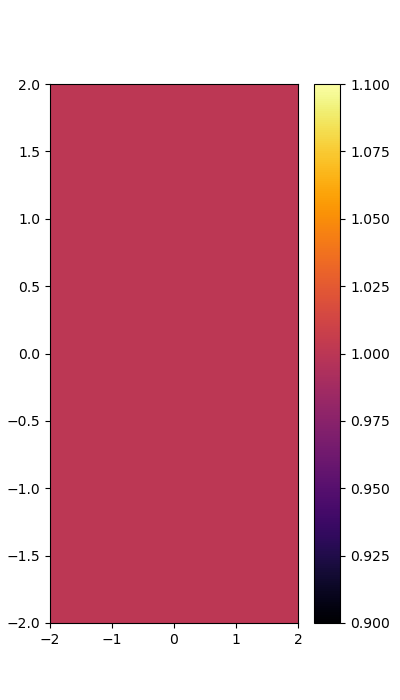

In [12]:
importlib.reload(athplot)
ds = athplot.rawDataRestricted("work/m-wave/sbox/testing/ssheet.out2.00008.athdf")
fig, ax = plt.subplots(figsize=(4, 7))
for lev in range(1):
    cccs, lds = ds.get_level(lev) # meaning: cell center coordinates, level data set
    meshr, meshphi = np.meshgrid(cccs[0], cccs[1])
    print(lds.keys())
    im = ax.pcolormesh(meshr, meshphi, lds['rho'], shading='nearest', cmap="inferno")
plt.colorbar(im)